In [2]:
# Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

%matplotlib inline
import warnings;
warnings.filterwarnings('ignore');

In [3]:
# load the data
data=pd.read_csv("C:/Users/Anupa/Desktop/Learnby- Machine learning & AI/Statistics & Machine Learning_August 2020/PPT & CODE/Logistic Regression/Practise Code/diabetes.csv")

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.shape

(768, 9)

In [6]:
data.dtypes

# No categorical data only numerical data is present

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
# Missing Value
data.info()


# No missing value has been found out

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
# Check for the outliers

data.quantile([0.01,0.05,0.99])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0.01,0.0,57.0,0.0,0.00,0.0,0.000,0.09468,21.0,0.0
0.05,0.0,79.0,38.7,0.00,0.0,21.800,0.14035,21.0,0.0
0.99,13.0,196.0,106.0,51.33,519.9,50.759,1.69833,67.0,1.0


In [ ]:
# We may observe that There are not many outliers

In [17]:
# Check the event rate of the given data
data["Outcome"].mean()

0.3489583333333333

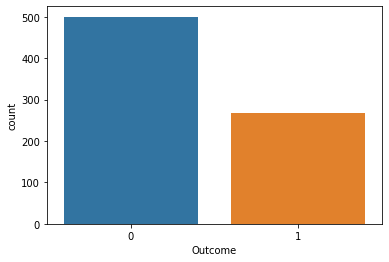

In [22]:
sns.countplot(data["Outcome"],data=data)
plt.show()

In [41]:
# Relation Between the feature & mean of outcome
for i in data.columns:
    x=data.groupby(i)["Outcome"].mean()
    print(x)


Pregnancies
0     0.342342
1     0.214815
2     0.184466
3     0.360000
4     0.338235
5     0.368421
6     0.320000
7     0.555556
8     0.578947
9     0.642857
10    0.416667
11    0.636364
12    0.444444
13    0.500000
14    1.000000
15    1.000000
17    1.000000
Name: Outcome, dtype: float64
Glucose
0      0.40
44     0.00
56     0.00
57     0.00
61     0.00
       ... 
195    1.00
196    1.00
197    0.75
198    1.00
199    1.00
Name: Outcome, Length: 136, dtype: float64
BloodPressure
0      0.457143
24     0.000000
30     0.500000
38     0.000000
40     1.000000
44     0.000000
46     0.000000
48     0.200000
50     0.384615
52     0.272727
54     0.181818
55     0.000000
56     0.083333
58     0.095238
60     0.189189
61     0.000000
62     0.294118
64     0.302326
65     0.142857
66     0.366667
68     0.266667
70     0.403509
72     0.363636
74     0.326923
75     0.125000
76     0.461538
78     0.377778
80     0.325000
82     0.433333
84     0.521739
85     0.500000
86     0.4

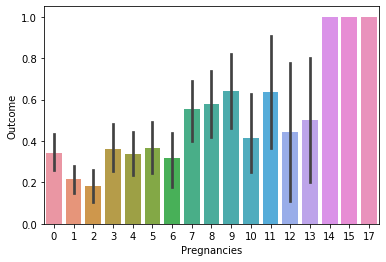

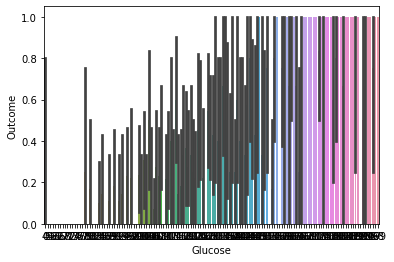

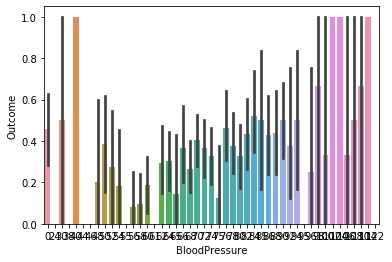

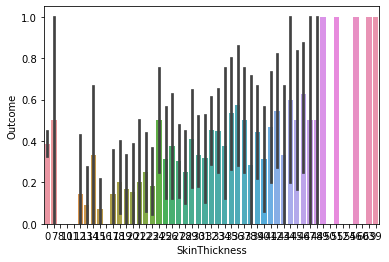

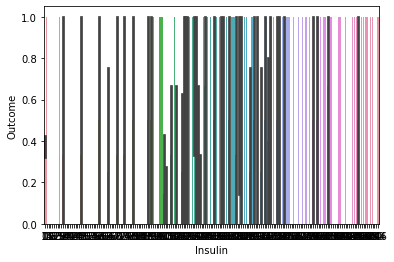

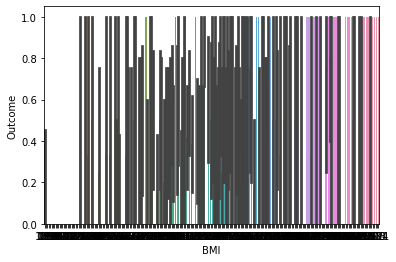

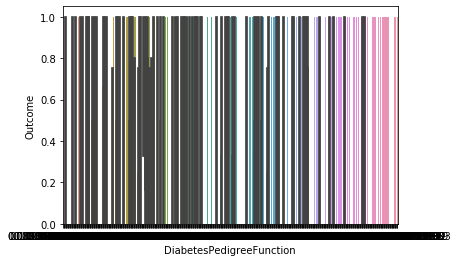

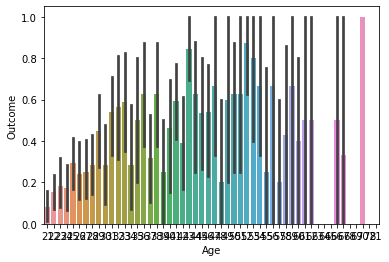

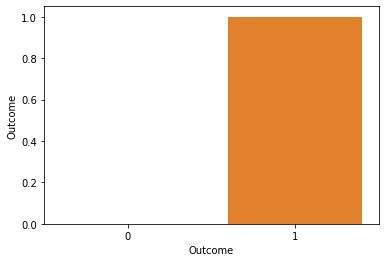

In [31]:
# Graphically Visualising the data for feature Selection
from numpy import mean
for i in data.columns:
    plt.show()
    sns.barplot(x=i,y="Outcome",data=data,estimator=mean)
    

In [ ]:
# As the visualisation is too messy due to more values in each feature.
# To avoid this, we will use Ranking & Plotting method for data visualisation wrt Outcome variable

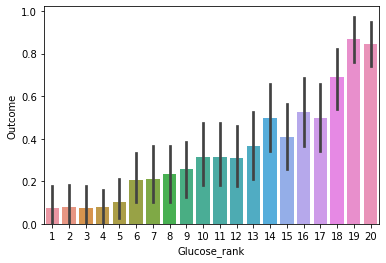

In [52]:
# Create a Bucket/Rank of the variables and then accross each bucket/Rank, study the movement of probability of outcome variable
data['Glucose_rank']=pd.qcut(data['Glucose'].rank(method='first').values,20,duplicates='drop').codes+1
sns.barplot(x="Glucose_rank" ,y="Outcome",data=data,estimator=mean)


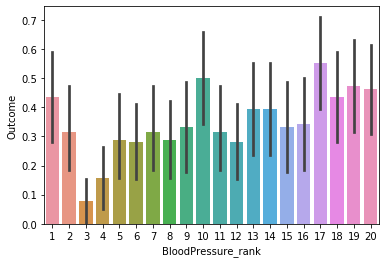

In [53]:
data['BloodPressure_rank']=pd.qcut(data['BloodPressure'].rank(method='first').values,20,duplicates='drop').codes+1
sns.barplot(x="BloodPressure_rank" ,y="Outcome",data=data,estimator=mean)

# Not considered because trend is not wrt outcome


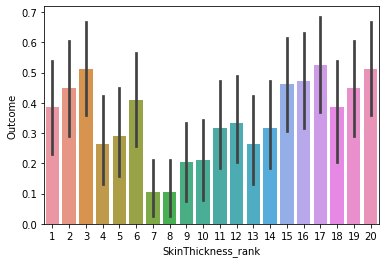

In [54]:
data['SkinThickness_rank']=pd.qcut(data['SkinThickness'].rank(method='first').values,20,duplicates='drop').codes+1
sns.barplot(x="SkinThickness_rank" ,y="Outcome",data=data,estimator=mean)

# Not Consider in features

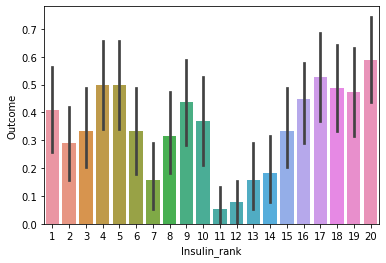

In [55]:
data['Insulin_rank']=pd.qcut(data['Insulin'].rank(method='first').values,20,duplicates='drop').codes+1
sns.barplot(x="Insulin_rank" ,y="Outcome",data=data,estimator=mean)


# Consider in Feature

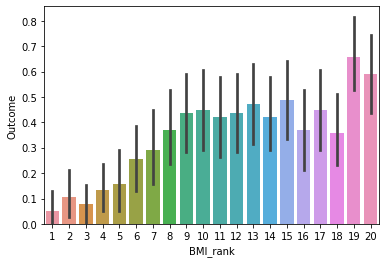

In [61]:
data['BMI_rank']=pd.qcut(data['BMI'].rank(method='first').values,20,duplicates='drop').codes+1
sns.barplot(x="BMI_rank" ,y="Outcome",data=data,estimator=mean)



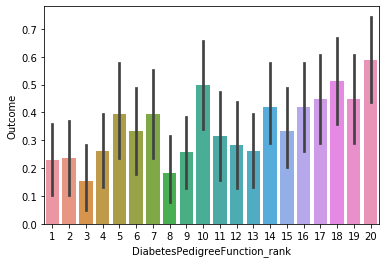

In [62]:
data['DiabetesPedigreeFunction_rank']=pd.qcut(data['DiabetesPedigreeFunction'].rank(method='first').values,20,duplicates='drop').codes+1
sns.barplot(x="DiabetesPedigreeFunction_rank" ,y="Outcome",data=data,estimator=mean)


#  Consider in features


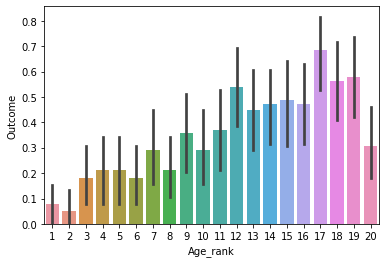

In [63]:
data['Age_rank']=pd.qcut(data['Age'].rank(method='first').values,20,duplicates='drop').codes+1
sns.barplot(x="Age_rank" ,y="Outcome",data=data,estimator=mean)


#  Consider in Feature list


In [ ]:
data['Age_rank']=pd.qcut(data['Age'].rank(method='first').values,20,duplicates='drop').codes+1
sns.barplot(x="Age_rank" ,y="Outcome",data=data,estimator=mean)

In [58]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Glucose_rank',
       'BloodPressure_rank', 'SkinThickness_rank', 'Insulin_rank', 'BMI_rank'],
      dtype='object')

In [64]:
# Feature Selection
X=data[["Pregnancies","Glucose","Insulin","BMI","DiabetesPedigreeFunction","Age"]].values
Y=data[["Outcome"]].values

In [76]:
# Train_test_Split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [77]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(614, 6)
(154, 6)
(614, 1)
(154, 1)


In [78]:
# Invoke logistic Regression Model
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
model=logreg.fit(X_train,Y_train)

In [79]:
# Prediction of data
Y_pred=model.predict(X_test)
Y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [80]:
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(Y_test,Y_pred)
conf_matrix


array([[81, 18],
       [19, 36]], dtype=int64)

In [81]:
# precision, recall & f1_score

from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [83]:
metrics.recall_score(Y_test,Y_pred)

0.6545454545454545

In [84]:
# Accuracy,Recall & Precision

from sklearn import metrics

print("Accuracy",metrics.accuracy_score(Y_test,Y_pred))

print()

print("Recall",metrics.recall_score(Y_test,Y_pred))

print()

print("Precision",metrics.precision_score(Y_test,Y_pred))


Accuracy 0.7597402597402597

Recall 0.6545454545454545

Precision 0.6666666666666666


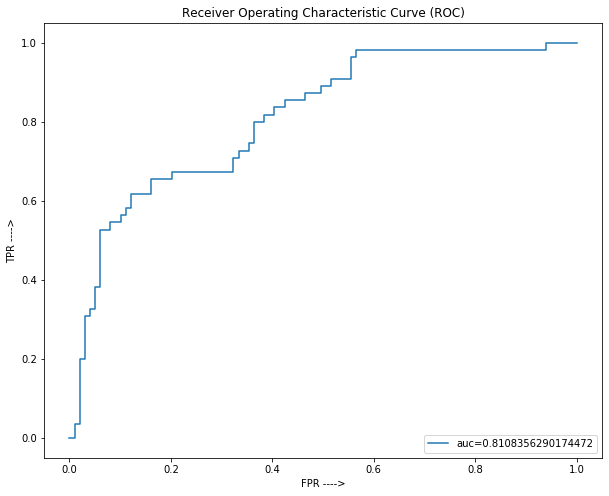

In [88]:
# ROC & AUC
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred_proba)
auc = metrics.roc_auc_score(Y_test,y_pred_proba)
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

In [98]:
# To build a Gains Chart
# Gains chart is useful to know how the given model will capture the event rate

y_pred_prob = logreg.predict_proba(X)[:, 1]
data['y_pred_P']=pd.DataFrame(y_pred_prob)
data['P_Rank_RF']=pd.qcut(data['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df=data.groupby('P_Rank_RF')['Outcome'].agg(['count','mean'])
rank_df=pd.DataFrame(rank_df)
sorted_rank_df=rank_df.sort_values(by='P_Rank_RF',ascending=False)
sorted_rank_df

,count,mean
P_Rank_RF,,
10,77,0.844156
9,77,0.727273
8,77,0.493506
7,76,0.394737
6,77,0.415584
5,77,0.272727
4,76,0.210526
3,77,0.051948
2,77,0.012987


In [100]:

sorted_rank_df['N_events']=rank_df['count']*rank_df['mean']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df

,count,mean,N_events,cum_events
P_Rank_RF,,,,
10,77,0.844156,65.0,65.0
9,77,0.727273,56.0,121.0
8,77,0.493506,38.0,159.0
7,76,0.394737,30.0,189.0
6,77,0.415584,32.0,221.0
5,77,0.272727,21.0,242.0
4,76,0.210526,16.0,258.0
3,77,0.051948,4.0,262.0
2,77,0.012987,1.0,263.0


In [102]:
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()
sorted_rank_df


,count,mean,N_events,cum_events,event_cap,cum_event_cap
P_Rank_RF,,,,,,
10,77,0.844156,65.0,65.0,0.242537,0.242537
9,77,0.727273,56.0,121.0,0.208955,0.451493
8,77,0.493506,38.0,159.0,0.141791,0.593284
7,76,0.394737,30.0,189.0,0.111940,0.705224
6,77,0.415584,32.0,221.0,0.119403,0.824627
5,77,0.272727,21.0,242.0,0.078358,0.902985
4,76,0.210526,16.0,258.0,0.059701,0.962687
3,77,0.051948,4.0,262.0,0.014925,0.977612
2,77,0.012987,1.0,263.0,0.003731,0.981343


In [104]:
sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_rank_df

,count,mean,N_events,cum_events,event_cap,cum_event_cap,random_cap,cum_random_cap
P_Rank_RF,,,,,,,,
10,77,0.844156,65.0,65.0,0.242537,0.242537,0.100260,0.100260
9,77,0.727273,56.0,121.0,0.208955,0.451493,0.100260,0.200521
8,77,0.493506,38.0,159.0,0.141791,0.593284,0.100260,0.300781
7,76,0.394737,30.0,189.0,0.111940,0.705224,0.098958,0.399740
6,77,0.415584,32.0,221.0,0.119403,0.824627,0.100260,0.500000
5,77,0.272727,21.0,242.0,0.078358,0.902985,0.100260,0.600260
4,76,0.210526,16.0,258.0,0.059701,0.962687,0.098958,0.699219
3,77,0.051948,4.0,262.0,0.014925,0.977612,0.100260,0.799479
2,77,0.012987,1.0,263.0,0.003731,0.981343,0.100260,0.899740


In [106]:
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed

,P_Rank_RF,count,mean,N_events,cum_events,event_cap,cum_event_cap,random_cap,cum_random_cap
0,10,77,0.844156,65.0,65.0,0.242537,0.242537,0.100260,0.100260
1,9,77,0.727273,56.0,121.0,0.208955,0.451493,0.100260,0.200521
2,8,77,0.493506,38.0,159.0,0.141791,0.593284,0.100260,0.300781
3,7,76,0.394737,30.0,189.0,0.111940,0.705224,0.098958,0.399740
4,6,77,0.415584,32.0,221.0,0.119403,0.824627,0.100260,0.500000
5,5,77,0.272727,21.0,242.0,0.078358,0.902985,0.100260,0.600260
6,4,76,0.210526,16.0,258.0,0.059701,0.962687,0.098958,0.699219
7,3,77,0.051948,4.0,262.0,0.014925,0.977612,0.100260,0.799479
8,2,77,0.012987,1.0,263.0,0.003731,0.981343,0.100260,0.899740
9,1,77,0.064935,5.0,268.0,0.018657,1.000000,0.100260,1.000000


In [107]:
sorted_reindexed['decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_RF,count,mean,N_events,cum_events,event_cap,cum_event_cap,random_cap,cum_random_cap,decile
0,10,77,0.844156,65.0,65.0,0.242537,0.242537,0.100260,0.100260,1
1,9,77,0.727273,56.0,121.0,0.208955,0.451493,0.100260,0.200521,2
2,8,77,0.493506,38.0,159.0,0.141791,0.593284,0.100260,0.300781,3
3,7,76,0.394737,30.0,189.0,0.111940,0.705224,0.098958,0.399740,4
4,6,77,0.415584,32.0,221.0,0.119403,0.824627,0.100260,0.500000,5
5,5,77,0.272727,21.0,242.0,0.078358,0.902985,0.100260,0.600260,6
6,4,76,0.210526,16.0,258.0,0.059701,0.962687,0.098958,0.699219,7
7,3,77,0.051948,4.0,262.0,0.014925,0.977612,0.100260,0.799479,8
8,2,77,0.012987,1.0,263.0,0.003731,0.981343,0.100260,0.899740,9
9,1,77,0.064935,5.0,268.0,0.018657,1.000000,0.100260,1.000000,10


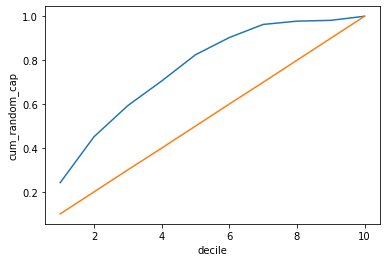

In [108]:
ax = sns.lineplot( x="decile", y="cum_event_cap", data=sorted_reindexed)
ax = sns.lineplot( x="decile", y="cum_random_cap", data=sorted_reindexed)